**CLOTHING CLASSIFICATION**

In [ ]:
# creating and saving our model to file
import tensorflow
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load dataset
def load_dataset():
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape to a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encoding
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# image preprocessing
def prep_pixels(train, test):
	# convert to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalization
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm
 
# model settings
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()])
	return model
 
# evaluating
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = define_model()
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	model.save('final_model.h5')
 
run_test_harness()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**Evaluation on test data**

In [ ]:
from keras.datasets import fashion_mnist
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
 
def load_dataset():
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm
 
# evaluating
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = load_model('final_model.h5')
	_, acc, prec, rec = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0), (prec * 100.0) ,(rec * 100.0))
 
run_test_harness()

> 91.520 92.15130805969238 91.10999703407288


**Predictions for user photo**

In [ ]:
#USER PHOTO
from google.colab import files
uploaded = files.upload()

Saving i (3).jpg to i (3).jpg


In [ ]:
entered_gender = input('Укажите пол (М или Ж): ')
entered_season = input('Укажите сезон (Зима, Весна, Лето, Осень): ')
print(entered_gender)
print(entered_season)

Укажите пол (М или Ж): Ж
Укажите сезон (Зима, Весна, Лето, Осень): Лето
Ж
Лето


In [ ]:
#OUR MODEL
from google.colab import files
uploaded = files.upload()

Saving final_model.h5 to final_model.h5


In [ ]:
#CLOTHING LABELS
from google.colab import files
uploaded = files.upload()

Saving cloth_cat.xlsx to cloth_cat.xlsx


In [ ]:
import pandas as pd
categ = pd.read_excel('cloth_cat.xlsx')
categ

,num,category
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


In [ ]:
# BENCHMARK COLOR COMBINATIONS
from google.colab import files
uploaded = files.upload()

Saving bencmark_hex.xlsx to bencmark_hex.xlsx


In [ ]:
import pandas as pd
benchmark_color = pd.read_excel('bencmark_hex.xlsx')
benchmark_color

,el1,el2
0,#949398FF,#F4DF4EFF
1,#FC766AFF,#5B84B1FF
2,#5F4B8BFF,#E69A8DFF
3,#42EADDFF,#CDB599FF
4,#000000FF,#FFFFFFFF
...,...,...
162,#ABD1C9FF,#97B3D0FF
163,#DBBEA1FF,#D34F73FF
164,#E3170AFF,#F7B32BFF
165,#2E5266FF,#D3D0CBFF


In [ ]:
#TRANSFORM TO RGB
from PIL import ImageColor
for i in range(len(benchmark_color.columns)):
  for j in range(len(benchmark_color)):
    if pd.isna(benchmark_color.iloc[j,i]) == False:
      benchmark_color.iloc[j,i] = ImageColor.getcolor(benchmark_color.iloc[j,i], "RGB")
benchmark_color

,el1,el2
0,"(148, 147, 152)","(244, 223, 78)"
1,"(252, 118, 106)","(91, 132, 177)"
2,"(95, 75, 139)","(230, 154, 141)"
3,"(66, 234, 221)","(205, 181, 153)"
4,"(0, 0, 0)","(255, 255, 255)"
...,...,...
162,"(171, 209, 201)","(151, 179, 208)"
163,"(219, 190, 161)","(211, 79, 115)"
164,"(227, 23, 10)","(247, 179, 43)"
165,"(46, 82, 102)","(211, 208, 203)"


In [ ]:
#CONVERT TO LIST
import re
for i in range(len(benchmark_color.columns)):
  for j in range(len(benchmark_color)):
    benchmark_color.iloc[j,i] = re.findall('[0-9]+', str(benchmark_color.iloc[j,i]))
benchmark_color

,el1,el2
0,"[148, 147, 152]","[244, 223, 78]"
1,"[252, 118, 106]","[91, 132, 177]"
2,"[95, 75, 139]","[230, 154, 141]"
3,"[66, 234, 221]","[205, 181, 153]"
4,"[0, 0, 0]","[255, 255, 255]"
...,...,...
162,"[171, 209, 201]","[151, 179, 208]"
163,"[219, 190, 161]","[211, 79, 115]"
164,"[227, 23, 10]","[247, 179, 43]"
165,"[46, 82, 102]","[211, 208, 203]"


In [ ]:
#CONVERT TO INTEGER
for i in range(len(benchmark_color)):
  for j in range(3):
    benchmark_color['el1'][i][j] = int(benchmark_color['el1'][i][j]) #столбец строка номер элемента в списке
    benchmark_color['el2'][i][j] = int(benchmark_color['el2'][i][j]) #столбец строка номер элемента в списке

In [ ]:
#CREATE 2 DIM VECTORS
for i in range(len(benchmark_color)):
    benchmark_color['el1'][i]  = [benchmark_color['el1'][i]]
    benchmark_color['el2'][i]  = [benchmark_color['el2'][i]]

In [ ]:
# category prediction for a new image.
import numpy as np
import re

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from PIL import Image, ImageOps

def load_image(filename):

	image = Image.open(filename)
	image = image.convert('L')
	im_invert = ImageOps.invert(image)
	image = im_invert.resize((28, 28))
	img = img_to_array(image)
	img = img.reshape(1, 28, 28, 1) 
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	global aaaaa
	img = load_image(filename)
	model = load_model('final_model.h5')
	result = model.predict(img)

	max_val = np.max(result[0])

	pos = np.where(result[0] == max_val)
	cat = re.findall('[0-9]+', str(pos))
	output = categ.loc[categ['num'] == int(cat[0])]
	aaaaa = output.iloc[0]['category']
	print(aaaaa)

filename = 'аа.webp' 

run_example()


Trouser


In [ ]:
#EXTRACT THE COLOR
import cv2
import numpy as np
img = cv2.imread(filename)
height, width = img.shape[:2]

# the size of region 
roi_size = 15 

roi_values = img[int((height-roi_size)/2):int((height+roi_size)/2),int((width-roi_size)/2):int((width+roi_size)/2)]
mean_blue = np.mean(roi_values[:,:,0])
mean_green = np.mean(roi_values[:,:,1])
mean_red = np.mean(roi_values[:,:,2])

print("R: {}  G: {}  B: {}".format(mean_red, mean_green, mean_blue))


R: 2.608888888888889  G: 89.12  B: 161.84444444444443


In [ ]:
#LIST REPRESENTATION
extr_rgb = []
extr_rgb.extend((mean_red, mean_green, mean_blue))
extr_rgb = [extr_rgb]
extr_rgb


[[2.608888888888889, 89.12, 161.84444444444443]]

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
benchmark_color['dist_betw_el1'] = ""
benchmark_color['dist_betw_el2'] = ""
for i in range(len(benchmark_color)):
  dist1 = euclidean_distances(extr_rgb, benchmark_color['el1'][i])
  dist2 = euclidean_distances(extr_rgb, benchmark_color['el2'][i])
  benchmark_color['dist_betw_el1'][i] = round(float(dist1),2)
  benchmark_color['dist_betw_el2'][i] = round(float(dist2),2)
benchmark_color

,el1,el2,dist_betw_el1,dist_betw_el2
0,"[[148, 147, 152]]","[[244, 223, 78]]",156.8,288.48
1,"[[252, 118, 106]]","[[91, 132, 177]]",257.19,99.41
2,"[[95, 75, 139]]","[[230, 154, 141]]",96.22,237.38
3,"[[66, 234, 221]]","[[205, 181, 153]]",168.84,222.45
4,"[[0, 0, 0]]","[[255, 255, 255]]",184.78,316.06
...,...,...,...,...
162,"[[171, 209, 201]]","[[151, 179, 208]]",210.38,179.52
163,"[[219, 190, 161]]","[[211, 79, 115]]",238.75,213.83
164,"[[227, 23, 10]]","[[247, 179, 43]]",278.89,286.23
165,"[[46, 82, 102]]","[[211, 208, 203]]",74.26,243.42


In [ ]:
#выбираем 2 сочетающихся цвета
c1_ind = np.argmin(benchmark_color['dist_betw_el1'])
rec_col1 = benchmark_color['el2'][c1_ind]
c2_ind = np.argmin(benchmark_color['dist_betw_el2'])
rec_col2 = benchmark_color['el1'][c1_ind]

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ostin.xlsx to ostin.xlsx


In [ ]:
import pandas as pd
ostin = pd.read_excel('ostin.xlsx')
ostin.head()

,Цветомодель,Ссылка,Товарная_группа,Основной_цвет,Тип_ткани,Пол,R,G,B,RGB,ТГ_модель
0,MP4274-92,MP4274-92_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"(128,128,128)",Trouser
1,MP4291-98,MP4291-98_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"(128,128,128)",Trouser
2,LL72B1-98,LL72B1-98_1.jpg,Шорты,Серый,Трикотаж кроеный,Ж,128,128,128,"(128,128,128)",Trouser
3,MP4292-98,MP4292-98_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"(128,128,128)",Trouser
4,MP4297-98,MP4297-98_1.jpg,Шорты,Серый,Текстиль,М,128,128,128,"(128,128,128)",Trouser


In [ ]:
#TO LIST
import re
for i in range(len(ostin)):
  ostin['RGB'][i] = re.findall('[0-9]+', str(ostin['RGB'][i]))
ostin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Цветомодель,Ссылка,Товарная_группа,Основной_цвет,Тип_ткани,Пол,R,G,B,RGB,ТГ_модель
0,MP4274-92,MP4274-92_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"[128, 128, 128]",Trouser
1,MP4291-98,MP4291-98_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"[128, 128, 128]",Trouser
2,LL72B1-98,LL72B1-98_1.jpg,Шорты,Серый,Трикотаж кроеный,Ж,128,128,128,"[128, 128, 128]",Trouser
3,MP4292-98,MP4292-98_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"[128, 128, 128]",Trouser
4,MP4297-98,MP4297-98_1.jpg,Шорты,Серый,Текстиль,М,128,128,128,"[128, 128, 128]",Trouser
...,...,...,...,...,...,...,...,...,...,...,...
14004,LT42A6-99,LT42A6-99_1.jpg,Футболки,Черный,Трикотаж кроеный,Ж,0,0,0,"[0, 0, 0]",T-shirt/top
14005,LS4293-99,LS4293-99_1.jpg,Блузки [ОС],Черный,Текстиль,Ж,0,0,0,"[0, 0, 0]",Shirt
14006,LT4294-99,LT4294-99_1.jpg,Футболки,Черный,Трикотаж кроеный,Ж,0,0,0,"[0, 0, 0]",T-shirt/top
14007,LT42A5-99,LT42A5-99_1.jpg,Футболки,Черный,Трикотаж кроеный,Ж,0,0,0,"[0, 0, 0]",T-shirt/top


In [ ]:
#TO INTEGERS
for i in range(len(ostin)):
  for j in range(3):
    ostin['RGB'][i][j] = int(ostin['RGB'][i][j]) #столбец строка номер элемента в списке
    

In [ ]:
#2 DIM VECTORS
for i in range(len(ostin)):
    ostin['RGB'][i] = [ostin['RGB'][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
above_waist = ['Shirt','T-shirt/top','Pullover','Coat']
under_waist = ['Trouser']
one_piece = ['Dress']
acs = ['Bag']

In [ ]:
#подбираем для верха
filt_data = pd.DataFrame()
if aaaaa in above_waist:
  filt_data = ostin.query('ТГ_модель == "Trouser" or ТГ_модель == "Bag"') #подбираем среди низов
  if entered_gender == 'Ж':
    filt_data = filt_data.query('Пол == "Ж"') #подбираем согласно полу
  else:
    filt_data = filt_data.query('Пол == "М"')
  if entered_season != 'Лето':
    filt_data = filt_data.query('Товарная_группа == "Юбки" or Товарная_группа == "Брюки" or ТГ_модель == "Bag"') #убираем шорты из зимы
#подбираем для платьев
if aaaaa in one_piece:
  filt_data = ostin.query('ТГ_модель == "Coat" or ТГ_модель == "Bag"')
  if entered_season == 'Лето':
    filt_data = filt_data.query('Товарная_группа == "Сумки"') #убираем куртки из лета
#подбираем для низов
if aaaaa in under_waist:
  filt_data = ostin.query('ТГ_модель == "Shirt" or ТГ_модель == "T-shirt/top" or ТГ_модель == "Pullover" or ТГ_модель == "Coat" or ТГ_модель == "Bag"')
  if entered_season == 'Лето':
      filt_data = filt_data.query('ТГ_модель == "Shirt" or ТГ_модель == "T-shirt/top" or ТГ_модель == "Pullover" or ТГ_модель == "Bag"') #убираем куртки из лета
  if entered_gender == 'Ж':
      filt_data = filt_data.query('Пол == "Ж"') #подбираем согласно полу
  else:
      filt_data = filt_data.query('Пол == "М"')

In [ ]:
filt_data

,Цветомодель,Ссылка,Товарная_группа,Основной_цвет,Тип_ткани,Пол,R,G,B,RGB,ТГ_модель
0,MP4274-92,MP4274-92_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"[[128, 128, 128]]",Trouser
1,MP4291-98,MP4291-98_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"[[128, 128, 128]]",Trouser
3,MP4292-98,MP4292-98_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"[[128, 128, 128]]",Trouser
5,MP6281-92,MP6281-92_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"[[128, 128, 128]]",Trouser
6,MPD276-95,MPD276-95_1.jpg,Брюки,Серый,Текстиль,М,128,128,128,"[[128, 128, 128]]",Trouser
...,...,...,...,...,...,...,...,...,...,...,...
13872,MP4213-99,MP4213-99_1.jpg,Брюки,Черный,Текстиль,М,0,0,0,"[[0, 0, 0]]",Trouser
13881,MPA103-99,MPA103-99_1.jpg,Брюки,Черный,Текстиль,М,0,0,0,"[[0, 0, 0]]",Trouser
13882,MG6244-99,MG6244-99_1.jpg,Сумки,Черный,Аксессуары,М,0,0,0,"[[0, 0, 0]]",Bag
13884,MP5211-99,MP5211-99_1.jpg,Брюки,Черный,Текстиль,М,0,0,0,"[[0, 0, 0]]",Trouser


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
filt_data['dist_betw_rec1'] = ""
filt_data['dist_betw_rec2'] = ""
filt_data.reset_index(inplace=True)
for i in range(len(filt_data)):
  dist1 = euclidean_distances(rec_col1, filt_data['RGB'][i])
  dist2 = euclidean_distances(rec_col2, filt_data['RGB'][i])
  filt_data['dist_betw_rec1'][i] = round(float(dist1),2)
  filt_data['dist_betw_rec2'][i] = round(float(dist2),2)

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/l

In [ ]:
n = 2
items_col1 = []
val = list(filt_data['Товарная_группа'].unique()) #filtering the categories
for i in range(len(val)):
  if val[i] in val:
    group = val[i]
    filt_data_cat = filt_data.query('Товарная_группа == @group')
    filt_data_cat.reset_index(inplace=True)
    min_indices = list(np.argpartition(filt_data_cat['dist_betw_rec1'],n-1)[:n])
    recom = list(filt_data_cat['Ссылка'].iloc[min_indices])
    items_col1.append(recom) 

items_col1

[['MP4274-92_1.jpg', 'ML7W31-95_1.jpg'],
 ['MG6Z3A-92_1.jpg', 'MG6Y44-92_2.jpg']]

In [ ]:
n = 2
items_col2 = []

val = list(filt_data['Товарная_группа'].unique()) #filtering the categories
for i in range(len(val)):
  if val[i] in val:
    group = val[i]
    filt_data_cat = filt_data.query('Товарная_группа == @group')
    filt_data_cat.reset_index(inplace=True)
    min_indices = list(np.argpartition(filt_data_cat['dist_betw_rec2'],n-1)[:n])
    recom = list(filt_data_cat['Ссылка'].iloc[min_indices])
    items_col2.append(recom) 

items_col2

[['MPDZ61-D3_1.jpg', 'MP9W53-65_1.jpg'],
 ['MG6V44-68_1.jpg', 'MG6V52-68_1.jpg']]

In [ ]:
# add reccomendations of 2 colors in one list
def Union(lst1, lst2):
    final_list = lst1 + lst2
    return final_list
all_items = Union(items_col1, items_col2)
all_items

[['MP4274-92_1.jpg', 'ML7W31-95_1.jpg'],
 ['MG6Z3A-92_1.jpg', 'MG6Y44-92_2.jpg'],
 ['MPDZ61-D3_1.jpg', 'MP9W53-65_1.jpg'],
 ['MG6V44-68_1.jpg', 'MG6V52-68_1.jpg']]

In [ ]:
all_items2 = []
for i in range(len(all_items)):
  all_items[i][0] = './media_content/' + all_items[i][0]
  all_items2.append(all_items[i][0])
  if len(all_items[i])>1:
    all_items[i][1] = './media_content/' + all_items[i][1]
    all_items2.append(all_items[i][1])
all_items2

['./media_content/MP4274-92_1.jpg',
 './media_content/ML7W31-95_1.jpg',
 './media_content/MG6Z3A-92_1.jpg',
 './media_content/MG6Y44-92_2.jpg',
 './media_content/MPDZ61-D3_1.jpg',
 './media_content/MP9W53-65_1.jpg',
 './media_content/MG6V44-68_1.jpg',
 './media_content/MG6V52-68_1.jpg']

In [ ]:
import zipfile 
import os      
import time    

from google.colab import drive 
from PIL import Image          


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# путь к файлу с архивом
zip_file = '/content/drive/My Drive/media_content.zip'  

# Распаковrf
z = zipfile.ZipFile(zip_file, 'r')
z.extractall(path='./media_content')

# результат разархивации
print(os.listdir(path='./media_content'))

['MP4Z82-98_1.jpg', 'LPDU3A-D5_1.jpg', 'LK4Z56-T6_1.jpg', 'LS4U82-16_1.jpg', 'MB3W81-68_1.jpg', 'LA6241-T4_1.jpg', 'LT5T71-43_1.jpg', 'MT4Z56-N9_1.jpg', 'LT4Z51-G5_1.jpg', 'BJ7V85-Y6_1.jpg', 'GP7Y91-D3_1.jpg', 'BT6V44-14_1.jpg', 'LS4W12-68_1.jpg', 'MK5V93-97_1.jpg', 'MT1W44-26_1.jpg', 'LJ6Z91-98_1.jpg', 'GB4251-D5_1.jpg', 'BT6X41-68_1.jpg', 'BZW279-99_1.jpg', 'MS3Y12-00_1.jpg', 'ML7Z41-92_1.jpg', 'GL4U31-99_1.jpg', 'GU8S92-N3_1.jpg', 'LK4Z87-T2_4.jpg', 'MN624A-00_1.jpg', 'MJ6Y51-98_1.jpg', 'BA8V51-44_1.jpg', 'MT9294-64_1.jpg', 'MP4V46-95_1.jpg', 'MT7W15-65_1.jpg', 'BT6V57-17_1.jpg', 'BK7T31-68_1.jpg', 'LN6W24-X3_1.jpg', 'GZWY66-00_1.jpg', 'LU6Y72-02_1.jpg', 'LA6T31-68_1.jpg', 'MJ6Z83-69_1.jpg', 'LK4X51-02_1.jpg', 'LPDW9C-D3_1.jpg', 'MK6X63-T6_1.jpg', 'MT5255-99_1.jpg', 'LG6V45-68_1.jpg', 'GT6252-00_1.jpg', 'GK6V86-T1_1.jpg', 'GT6251-S5_1.jpg', 'BT6255-44_1.jpg', 'BAEW52-69_1.jpg', 'BHEY69-93_1.jpg', 'GHEW85-X4_1.jpg', 'MP4W99-63_1.jpg', 'LT4282-T3_1.jpg', 'MH6X84-99_1.jpg', 'GH8U55-N3_

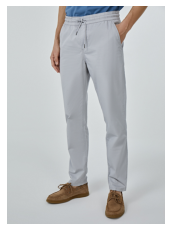

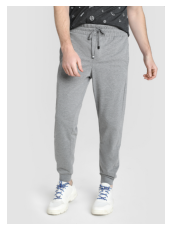

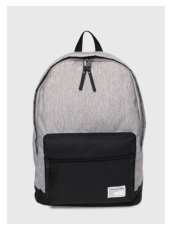

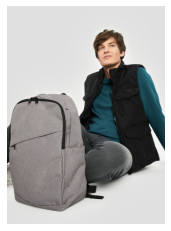

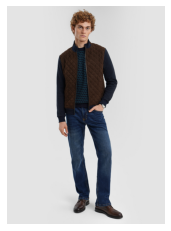

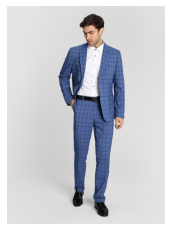

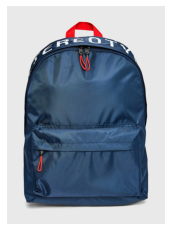

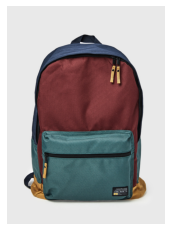

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
  
    image = mpimg.imread(filename)
    plt.figure()
    plt.axis('off')
    plt.imshow(image)

for file in all_items2:
    process(file)


In [ ]:
#save reccomendations
import sys
from PIL import Image

images = [Image.open(x) for x in all_items2]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('test2.jpg')

Random predictions

In [ ]:
all_items = []
val = list(ostin['Товарная_группа'].unique())
for i in range(len(val)):
  if val[i] in val:
    group = val[i]
    filt_data_cat = ostin.query('Товарная_группа == @group')
    filt_data_cat.reset_index(inplace=True)    
    recom = list(filt_data_cat['Ссылка'].sample(n = 2))    
    all_items.append(recom) 

all_items

In [ ]:
all_items2 = []
for i in range(len(all_items)):
  all_items[i][0] = './media_content/' + all_items[i][0]
  all_items2.append(all_items[i][0])
  if len(all_items[i])>1:
    all_items[i][1] = './media_content/' + all_items[i][1]
    all_items2.append(all_items[i][1])
all_items2

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    image = mpimg.imread(filename)

    plt.figure()
    plt.axis('off')
    plt.imshow(image)

for file in all_items2:
    process(file)

In [ ]:
#save
import sys
from PIL import Image

images = [Image.open(x) for x in all_items2]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('test2.jpg')